In [2]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
# import PyMieScatt as ps

-----------
Initializing structure...
Padding y to even number of grid points.
Padding z to even number of grid points.
Halving computational cell along direction y
Halving computational cell along direction z
time for choose_chunkdivision = 0.00548911 s
Working in 3D dimensions.
Computational cell is 8.28 x 8.28 x 8.28 with resolution 25
time for set_epsilon = 4.31874 s
-----------
Meep progress: 0.02/17.853981494903564 = 0.1% done in 4.4s, 3951.5s to go
on time step 1 (time=0.02), 4.43151 s/step
Meep progress: 1.04/17.853981494903564 = 5.8% done in 8.5s, 136.8s to go
on time step 52 (time=1.04), 0.0789669 s/step
Meep progress: 2.08/17.853981494903564 = 11.7% done in 12.5s, 95.0s to go
on time step 104 (time=2.08), 0.078199 s/step
Meep progress: 3.12/17.853981494903564 = 17.5% done in 16.6s, 78.2s to go
on time step 156 (time=3.12), 0.0775918 s/step
Meep progress: 4.12/17.853981494903564 = 23.1% done in 20.6s, 68.6s to go
on time step 206 (time=4.12), 0.0801639 s/step
Meep progress: 4

run 0 finished at t = 17.86 (893 timesteps)
-----------
Initializing structure...
Padding y to even number of grid points.
Padding z to even number of grid points.
Halving computational cell along direction y
Halving computational cell along direction z
time for choose_chunkdivision = 0.00425792 s
Working in 3D dimensions.
Computational cell is 8.28 x 8.28 x 8.28 with resolution 25
     sphere, center = (0,0,0)
          radius 1
          dielectric constant epsilon diagonal = (4,4,4)
time for set_epsilon = 8.49469 s
-----------
Meep progress: 0.02/107.85398149490356 = 0.0% done in 4.4s, 23892.4s to go
on time step 1 (time=0.02), 4.43148 s/step
Meep progress: 0.98/107.85398149490356 = 0.9% done in 8.5s, 926.8s to go
on time step 49 (time=0.98), 0.084722 s/step
Meep progress: 1.92/107.85398149490356 = 1.8% done in 12.5s, 690.6s to go
on time step 96 (time=1.92), 0.0854934 s/step
Meep progress: 2.88/107.85398149490356 = 2.7% done in 16.6s, 604.6s to go
on time step 144 (time=2.88), 0.08

/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


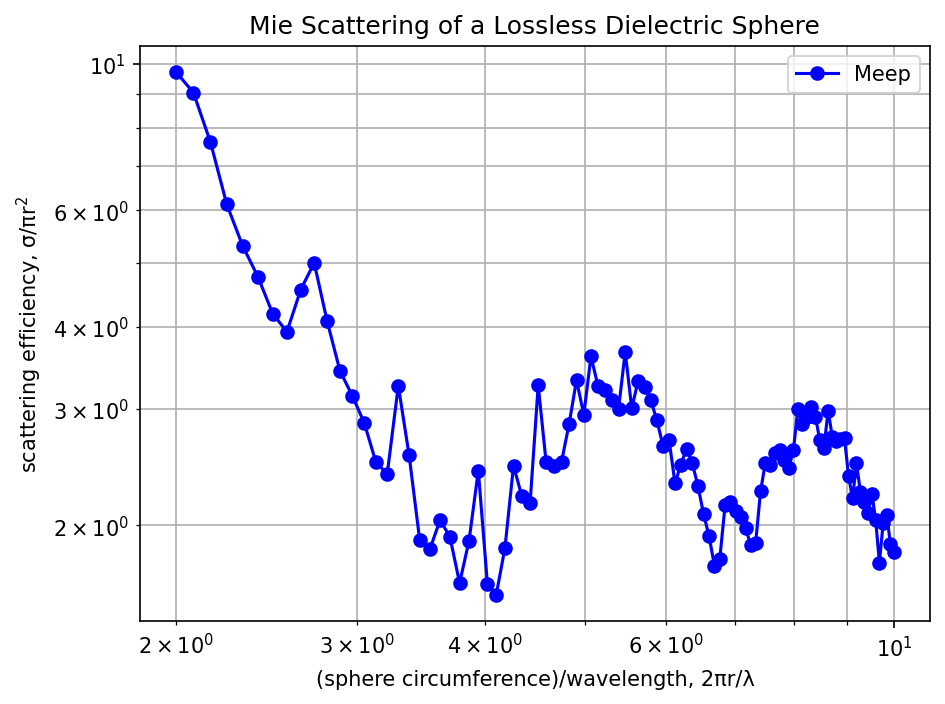

In [3]:
r = 1.0  # radius of sphere

wvl_min = 2*np.pi*r/10
wvl_max = 2*np.pi*r/2

frq_min = 1/wvl_max
frq_max = 1/wvl_min
frq_cen = 0.5*(frq_min+frq_max)
dfrq = frq_max-frq_min
nfrq = 100

## at least 8 pixels per smallest wavelength, i.e. np.floor(8/wvl_min)
resolution = 25

dpml = 0.5*wvl_max
dair = 0.5*wvl_max

pml_layers = [mp.PML(thickness=dpml)]

symmetries = [mp.Mirror(mp.Y),
              mp.Mirror(mp.Z,phase=-1)]

s = 2*(dpml+dair+r)
cell_size = mp.Vector3(s,s,s)

# is_integrated=True necessary for any planewave source extending into PML
sources = [mp.Source(mp.GaussianSource(frq_cen,fwidth=dfrq,is_integrated=True),
                     center=mp.Vector3(-0.5*s+dpml),
                     size=mp.Vector3(0,s,s),
                     component=mp.Ez)]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=sources,
                    k_point=mp.Vector3(),
                    symmetries=symmetries)

box_x1 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(x=-r),size=mp.Vector3(0,2*r,2*r)))
box_x2 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(x=+r),size=mp.Vector3(0,2*r,2*r)))
box_y1 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(y=-r),size=mp.Vector3(2*r,0,2*r)))
box_y2 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(y=+r),size=mp.Vector3(2*r,0,2*r)))
box_z1 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(z=-r),size=mp.Vector3(2*r,2*r,0)))
box_z2 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(z=+r),size=mp.Vector3(2*r,2*r,0)))

sim.run(until_after_sources=10)

freqs = mp.get_flux_freqs(box_x1)
box_x1_data = sim.get_flux_data(box_x1)
box_x2_data = sim.get_flux_data(box_x2)
box_y1_data = sim.get_flux_data(box_y1)
box_y2_data = sim.get_flux_data(box_y2)
box_z1_data = sim.get_flux_data(box_z1)
box_z2_data = sim.get_flux_data(box_z2)

box_x1_flux0 = mp.get_fluxes(box_x1)

sim.reset_meep()

n_sphere = 2.0
geometry = [mp.Sphere(material=mp.Medium(index=n_sphere),
                      center=mp.Vector3(),
                      radius=r)]

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell_size,
                    boundary_layers=pml_layers,
                    sources=sources,
                    k_point=mp.Vector3(),
                    symmetries=symmetries,
                    geometry=geometry)

box_x1 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(x=-r),size=mp.Vector3(0,2*r,2*r)))
box_x2 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(x=+r),size=mp.Vector3(0,2*r,2*r)))
box_y1 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(y=-r),size=mp.Vector3(2*r,0,2*r)))
box_y2 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(y=+r),size=mp.Vector3(2*r,0,2*r)))
box_z1 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(z=-r),size=mp.Vector3(2*r,2*r,0)))
box_z2 = sim.add_flux(frq_cen, dfrq, nfrq, mp.FluxRegion(center=mp.Vector3(z=+r),size=mp.Vector3(2*r,2*r,0)))

sim.load_minus_flux_data(box_x1, box_x1_data)
sim.load_minus_flux_data(box_x2, box_x2_data)
sim.load_minus_flux_data(box_y1, box_y1_data)
sim.load_minus_flux_data(box_y2, box_y2_data)
sim.load_minus_flux_data(box_z1, box_z1_data)
sim.load_minus_flux_data(box_z2, box_z2_data)

sim.run(until_after_sources=100)

box_x1_flux = mp.get_fluxes(box_x1)
box_x2_flux = mp.get_fluxes(box_x2)
box_y1_flux = mp.get_fluxes(box_y1)
box_y2_flux = mp.get_fluxes(box_y2)
box_z1_flux = mp.get_fluxes(box_z1)
box_z2_flux = mp.get_fluxes(box_z2)

scatt_flux = np.asarray(box_x1_flux)-np.asarray(box_x2_flux)+np.asarray(box_y1_flux)-np.asarray(box_y2_flux)+np.asarray(box_z1_flux)-np.asarray(box_z2_flux)
intensity = np.asarray(box_x1_flux0)/(2*r)**2
scatt_cross_section = np.divide(scatt_flux,intensity)
scatt_eff_meep = scatt_cross_section*-1/(np.pi*r**2)
# scatt_eff_theory = [ps.MieQ(n_sphere,1000/f,2*r*1000,asDict=True)['Qsca'] for f in freqs]

if mp.am_master():
    plt.figure(dpi=150)
    plt.loglog(2*np.pi*r*np.asarray(freqs),scatt_eff_meep,'bo-',label='Meep')
    # plt.loglog(2*np.pi*r*np.asarray(freqs),scatt_eff_theory,'ro-',label='theory')
    plt.grid(True,which="both",ls="-")
    plt.xlabel('(sphere circumference)/wavelength, 2πr/λ')
    plt.ylabel('scattering efficiency, σ/πr$^{2}$')
    plt.legend(loc='upper right')
    plt.title('Mie Scattering of a Lossless Dielectric Sphere')
    plt.tight_layout()
    plt.savefig("mie_scattering.png")


     sphere, center = (0,0,0)
          radius 1
          dielectric constant epsilon diagonal = (4,4,4)


<AxesSubplot:xlabel='X', ylabel='Y'>

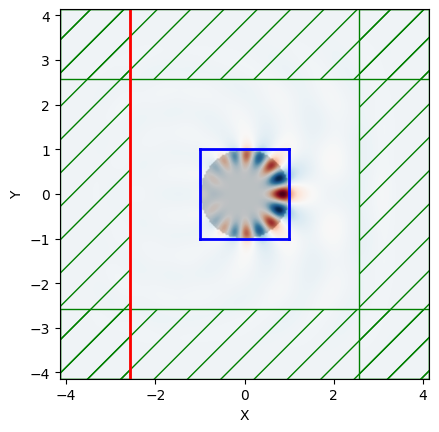

In [5]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(),size=mp.Vector3(s,s,0)),fields=mp.Ez)